## Exploration des données

In [69]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
train = pd.read_csv('../data/train.csv')
del train['Unnamed: 0']
del train["count"]

In [17]:
train.shape

(9063, 12)

In [18]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.00000,9063.000000,9063.000000,9063.000000,9063.000000
mean,2.256538,0.026371,0.682886,1.408695,20.454037,23.855776,61.09776,12.968729,35.175770,143.530067,178.705837
std,1.041754,0.160245,0.465378,0.635883,8.079983,8.787939,19.55179,8.262341,48.868148,140.005449,170.535533
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.00000,7.001500,4.000000,33.000000,39.000000
50%,2.000000,0.000000,1.000000,1.000000,21.320000,24.240000,61.00000,12.998000,16.000000,109.000000,134.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,77.00000,19.001200,48.000000,206.000000,266.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.00000,56.996900,367.000000,790.000000,897.000000


In [19]:
#for col in train.columns:
#    plt.scatter(x = train['casual'], y =train[col])
#    plt.title(col)  
#    plt.show()

In [20]:
#for col in train.columns:
#    plt.scatter(x = train['registered'], y =train[col])
#    plt.title(col)  
#    plt.show()

In [21]:
#with sns.axes_style('ticks', {'figure.facecolor': 'white'}):
#    plt.figure(figsize=(8,8))
#    sns.heatmap(train.corr(),cmap="PiYG")
#    plt.title("Correlations Between Variables", size=15)
#    plt.show()

In [71]:
train =train.drop(columns=['casual','registered'],axis=1)


## Cluestering 

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
#                'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
# cat_attributes = ['order_status', 'customer_state', 'payment_type']


num_attributes = train.select_dtypes(include=['float']).columns.tolist()
cat_attributes = train.select_dtypes(include=['object']).columns.tolist()

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(train)
df_prepared


<9063x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 36252 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.decomposition import PCA

df_prepared = df_prepared.toarray()
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape


(9063, 7250)

In [75]:
from sklearn.cluster import KMeans

k_range = range(2, 10)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]


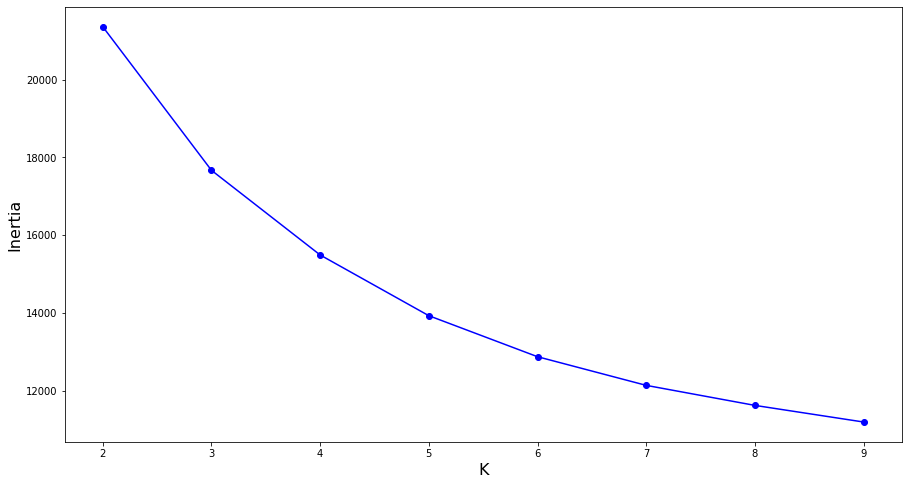

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [77]:


from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]



In [78]:
import numpy as np 

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

2

For n_clusters = 3 The average silhouette_score is : 0.27631850910386696
For n_clusters = 4 The average silhouette_score is : 0.20237438215974415
For n_clusters = 5 The average silhouette_score is : 0.189792725409922
For n_clusters = 6 The average silhouette_score is : 0.16952221127079975
For n_clusters = 7 The average silhouette_score is : 0.1643385225406785
For n_clusters = 8 The average silhouette_score is : 0.1543556179194927


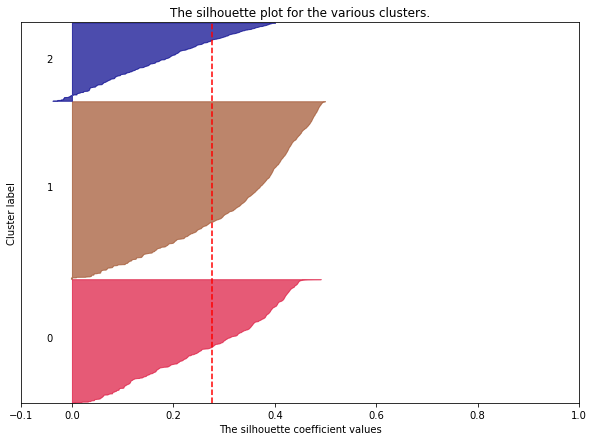

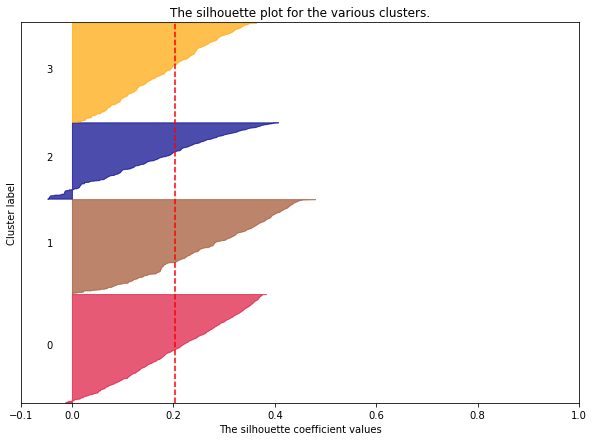

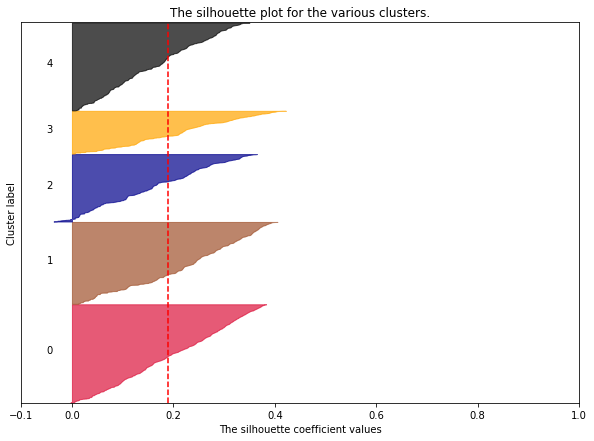

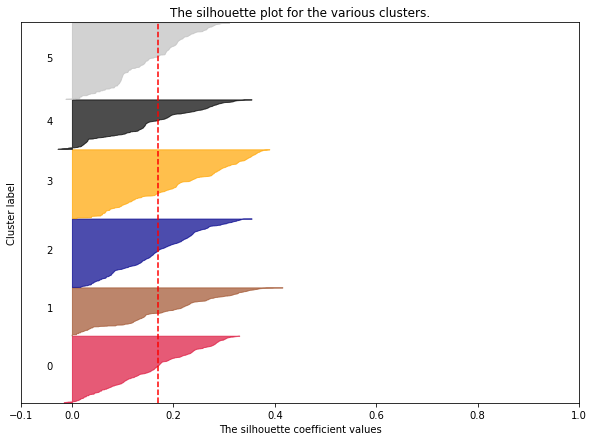

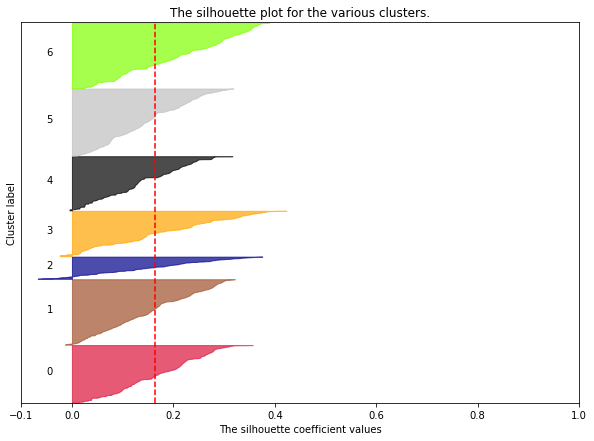

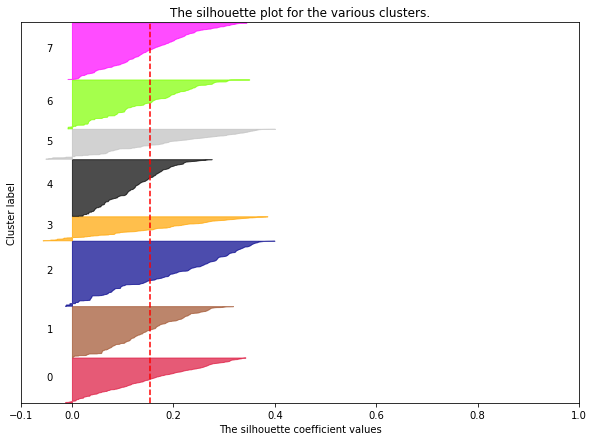

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray'
}

silhouette = []
nb_cluster_max = 8

range_n_clusters = range(3,nb_cluster_max+1)

prep_X = df_reduced

for n_clusters in range_n_clusters:
    # Création d'un subplot
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(prep_X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(prep_X)
    silhouette_avg = silhouette_score(prep_X, cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcul du score silhouette
    sample_silhouette_values = silhouette_samples(prep_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

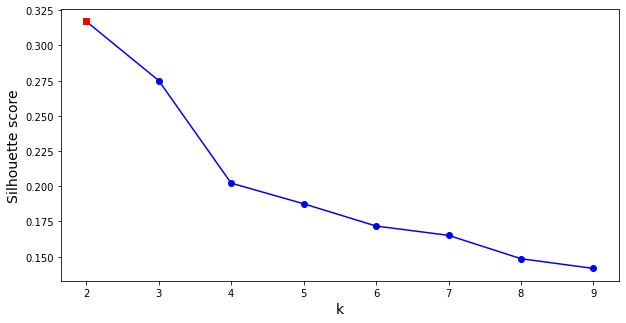

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

## cluster = 4

In [82]:
best_model = kmeans_per_k[2]
best_model

KMeans(n_clusters=4, random_state=42)

In [83]:
y_pred = best_model.fit_predict(df_reduced)

In [84]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


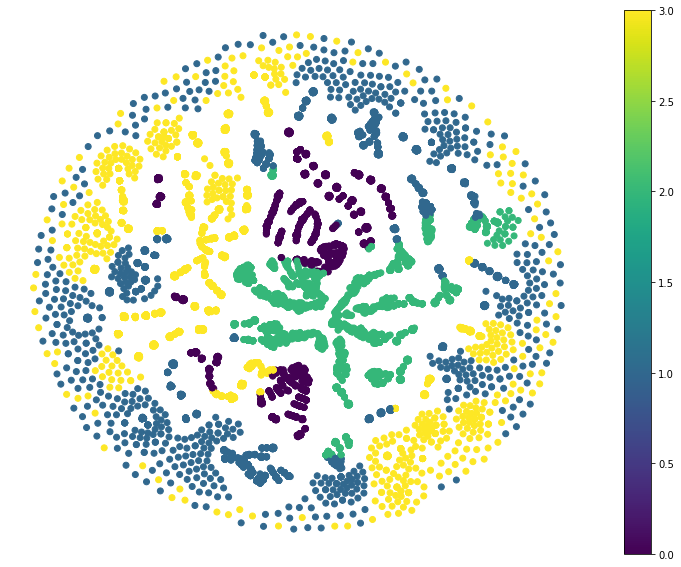

In [85]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

In [86]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=42).fit(df_reduced)

train['kmean'] = kmean.labels_ 

In [87]:
train['year'] = pd.to_datetime(train.datetime).dt.year
train['hour'] = pd.to_datetime(train.datetime).dt.hour
train['day'] = pd.to_datetime(train.datetime).dt.day
train.drop('datetime', axis=1, inplace=True)

In [88]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit_predict(train)

train['kmean'] = kmean.labels_

In [89]:
train.groupby('kmean').describe()

season                                              holiday            \
        count      mean       std  min  25%  50%  75%  max   count      mean   
kmean                                                                          
0      2383.0  2.604700  0.740353  1.0  2.0  3.0  3.0  4.0  2383.0  0.024759   
1      2051.0  1.670405  1.164347  1.0  1.0  1.0  2.0  4.0  2051.0  0.043393   
2      1760.0  2.260227  0.850648  1.0  2.0  2.0  3.0  4.0  1760.0  0.019886   
3      2869.0  2.384106  1.094667  1.0  1.0  2.0  3.0  4.0  2869.0  0.019519   

       ...  hour           day                                             \
       ...   75%   max   count       mean       std  min  25%   50%   75%   
kmean  ...                                                                  
0      ...  18.0  23.0  2383.0  10.703315  5.631313  1.0  6.0  11.0  16.0   
1      ...  18.0  23.0  2051.0   9.676743  5.330294  1.0  5.0  10.0  14.0   
2      ...  18.0  23.0  1760.0  10.013636  5.301146  1.0  6.0  10.0  14.0   
3      ...  14.0  23.0  2869.0   9.609620  5.498725  1.0  5.0   9.0  14.0   

             
        max  
kmean        
0      19.0  
1      19.0  
2      19.0  
3      19.0  

[4 rows x 88 columns]

In [90]:
train.groupby('kmean').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,day
kmean,,,,,,,,,,,
0,2.604700,0.024759,0.679815,1.330256,26.221074,30.434528,62.698699,11.861764,2011.416702,11.964331,10.703315
1,1.670405,0.043393,0.659191,1.224768,11.306485,13.566407,49.094588,15.519601,2011.397367,11.594344,9.676743
2,2.260227,0.019886,0.697159,1.160227,26.521409,30.175565,36.383523,16.295607,2011.519886,15.059091,10.013636
3,2.384106,0.019519,0.693621,1.757755,18.481297,21.870242,83.509934,10.023716,2011.319972,9.018473,9.609620


In [91]:
train[train['kmean'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,kmean,year,hour,day
36,1,0,0,2,14.76,17.425,66,8.9981,0,2011,13,2
420,1,0,1,1,16.40,20.455,62,19.0012,0,2011,13,19
824,1,0,1,1,19.68,23.485,55,22.0028,0,2011,19,17
825,1,0,1,1,19.68,23.485,59,22.0028,0,2011,20,17
826,1,0,1,1,21.32,25.000,55,26.0027,0,2011,21,17
...,...,...,...,...,...,...,...,...,...,...,...,...
9054,3,0,0,2,26.24,30.305,65,0.0000,0,2012,15,19
9055,3,0,0,2,27.06,31.060,65,0.0000,0,2012,16,19
9058,3,0,0,2,26.24,30.305,73,8.9981,0,2012,19,19
9059,3,0,0,2,26.24,30.305,73,12.9980,0,2012,20,19


In [92]:
train[train['kmean'] == 1]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,kmean,year,hour,day
35,1,0,0,2,14.76,16.665,66,19.9995,1,2011,12,2
40,1,0,0,1,13.94,16.665,57,12.9980,1,2011,17,2
41,1,0,0,2,14.76,16.665,46,22.0028,1,2011,18,2
42,1,0,0,1,13.12,14.395,42,30.0026,1,2011,19,2
43,1,0,0,1,12.30,13.635,39,23.9994,1,2011,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7487,2,0,1,1,18.86,22.725,44,16.9979,1,2012,8,11
7674,2,0,0,1,20.50,24.240,48,7.0015,1,2012,3,19
8991,3,0,1,1,27.88,12.120,57,11.0014,1,2012,0,17
9002,3,0,1,1,31.16,12.120,52,19.0012,1,2012,11,17


In [93]:
train[train['kmean'] == 2]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,kmean,year,hour,day
679,1,0,1,1,13.12,15.910,21,11.0014,2,2011,15,11
681,1,0,1,1,12.30,16.665,24,0.0000,2,2011,17,11
703,1,0,0,1,13.94,15.150,29,27.9993,2,2011,15,12
704,1,0,0,1,13.94,15.150,29,27.9993,2,2011,16,12
724,1,0,0,1,15.58,19.695,29,23.9994,2,2011,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
9031,3,0,0,1,31.16,33.335,37,16.9979,2,2012,16,18
9032,3,0,0,1,31.16,33.335,37,15.0013,2,2012,17,18
9033,3,0,0,1,30.34,32.575,37,11.0014,2,2012,18,18
9034,3,0,0,1,28.70,31.820,45,11.0014,2,2012,19,18


In [94]:
train[train['kmean'] == 3]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,kmean,year,hour,day
0,1,0,0,1,9.84,14.395,81,0.0000,3,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0000,3,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,3,2011,2,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,3,1
4,1,0,0,1,9.84,14.395,75,0.0000,3,2011,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9052,3,0,0,3,26.24,28.790,83,8.9981,3,2012,13,19
9056,3,0,0,2,26.24,29.545,78,7.0015,3,2012,17,19
9057,3,0,0,2,26.24,29.545,78,7.0015,3,2012,18,19
9060,3,0,0,3,25.42,29.545,78,6.0032,3,2012,21,19


Le clustering suivants est basé sur 4 groupe : 
- un groupe d'utilisateurs utilsiant le vélos principalement l'apres midi 
- un groupe d'utilisateur utilisant le vélos le matin vers 7h 
- un groupe d'utilisateur utilisant le vélos vers 14h pendant les jours de travails 
- un groupe d'utilisateur utilisant le vélos vers 14h pendant les vacances 

## cluster = 6 

In [40]:
best_model = kmeans_per_k[4]
best_model

KMeans(n_clusters=6, random_state=42)

In [41]:
y_pred = best_model.fit_predict(df_reduced)

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


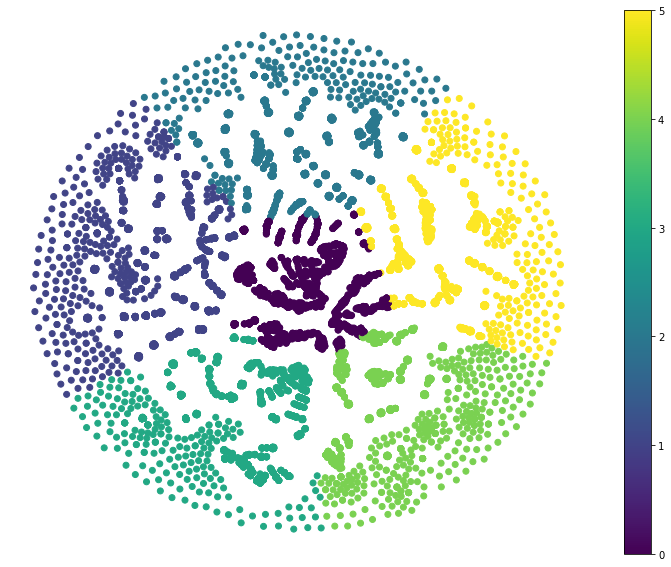

In [43]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

In [44]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=6, random_state=42).fit(df_reduced)

train['kmean'] = kmean.labels_ 

In [45]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=6, random_state=42)
kmean.fit_predict(train)

train['kmean'] = kmean.labels_

In [46]:
train.groupby('kmean').describe()

season                                              holiday            \
        count      mean       std  min  25%  50%  75%  max   count      mean   
kmean                                                                          
0      3178.0  2.091882  1.086323  1.0  1.0  2.0  3.0  4.0  3178.0  0.028634   
1      1097.0  2.530538  0.884388  1.0  2.0  3.0  3.0  4.0  1097.0  0.026436   
2      1747.0  2.391528  1.003486  1.0  2.0  2.0  3.0  4.0  1747.0  0.025758   
3       246.0  2.284553  0.613060  1.0  2.0  2.0  3.0  4.0   246.0  0.008130   
4      2178.0  2.195592  1.115860  1.0  1.0  2.0  3.0  4.0  2178.0  0.024334   
5       617.0  2.439222  0.843203  1.0  2.0  2.0  3.0  4.0   617.0  0.030794   

       ...  hour           day                                             \
       ...   75%   max   count       mean       std  min  25%   50%   75%   
kmean  ...                                                                  
0      ...   7.0  23.0  3178.0   9.805538  5.418693  1.0  5.0  10.0  14.0   
1      ...  18.0  22.0  1097.0  10.105743  5.474204  1.0  5.0  10.0  15.0   
2      ...  19.0  23.0  1747.0  10.082999  5.514791  1.0  5.0  10.0  15.0   
3      ...  18.0  19.0   246.0  10.878049  5.590203  1.0  6.0  12.0  16.0   
4      ...  20.0  23.0  2178.0  10.050964  5.528369  1.0  5.0  10.0  15.0   
5      ...  18.0  22.0   617.0   9.914100  5.405091  1.0  5.0  10.0  15.0   

             
        max  
kmean        
0      19.0  
1      19.0  
2      19.0  
3      19.0  
4      19.0  
5      19.0  

[6 rows x 96 columns]

In [47]:
train.groupby('kmean').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,day
kmean,,,,,,,,,,,,
0,2.091882,0.028634,0.659534,1.504720,16.718660,19.870099,69.775330,11.528372,26.462240,2011.333543,6.596602,9.805538
1,2.530538,0.026436,0.607110,1.292616,25.168842,28.836987,53.366454,13.530745,352.179581,2011.465816,14.374658,10.105743
2,2.391528,0.025758,0.744705,1.338294,22.860023,26.516053,56.195192,13.746087,226.563824,2011.441328,14.407556,10.082999
3,2.284553,0.008130,0.804878,1.239837,27.693333,31.408760,48.837398,14.052978,712.276423,2011.979675,14.939024,10.878049
4,2.195592,0.024334,0.707071,1.450872,19.070459,22.343586,60.428834,13.609580,122.286961,2011.307622,13.781451,10.050964
5,2.439222,0.030794,0.628849,1.238250,26.496499,30.322723,51.278768,14.492849,505.356564,2011.628849,14.708266,9.914100


In [48]:
train[train['kmean'] == 0].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.0,3178.000000,3178.000000,3178.000000
mean,2.091882,0.028634,0.659534,1.504720,16.718660,19.870099,69.775330,11.528372,26.462240,0.0,2011.333543,6.596602,9.805538
std,1.086323,0.166803,0.473940,0.712413,7.353886,8.114385,18.528352,8.005659,21.895796,0.0,0.471553,6.888994,5.418693
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000,0.0,2011.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,10.660000,12.880000,56.000000,6.003200,7.000000,0.0,2011.000000,2.000000,5.000000
50%,2.000000,0.000000,1.000000,1.000000,16.400000,20.455000,72.000000,11.001400,20.000000,0.0,2011.000000,4.000000,10.000000
75%,3.000000,0.000000,1.000000,2.000000,22.960000,26.515000,84.000000,16.997900,44.000000,0.0,2012.000000,7.000000,14.000000
max,4.000000,1.000000,1.000000,3.000000,33.620000,40.150000,100.000000,51.998700,77.000000,0.0,2012.000000,23.000000,19.000000


In [49]:
train[train['kmean'] == 1].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000,1097.000000,1097.000000
mean,2.530538,0.026436,0.607110,1.292616,25.168842,28.836987,53.366454,13.530745,352.179581,1.0,2011.465816,14.374658,10.105743
std,0.884388,0.160500,0.488615,0.531035,6.765117,7.207747,17.599993,8.031770,39.769932,0.0,0.499058,4.273392,5.474204
min,1.000000,0.000000,0.000000,1.000000,0.820000,3.030000,16.000000,0.000000,289.000000,1.0,2011.000000,7.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,20.500000,24.240000,39.000000,7.001500,317.000000,1.0,2011.000000,11.000000,5.000000
50%,3.000000,0.000000,1.000000,1.000000,26.240000,31.060000,52.000000,12.998000,350.000000,1.0,2011.000000,15.000000,10.000000
75%,3.000000,0.000000,1.000000,2.000000,30.340000,34.090000,66.000000,19.001200,384.000000,1.0,2012.000000,18.000000,15.000000
max,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900,429.000000,1.0,2012.000000,22.000000,19.000000


In [50]:
train[train['kmean'] == 2].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.0,1747.000000,1747.000000,1747.000000
mean,2.391528,0.025758,0.744705,1.338294,22.860023,26.516053,56.195192,13.746087,226.563824,2.0,2011.441328,14.407556,10.082999
std,1.003486,0.158459,0.436152,0.554616,7.474190,8.061932,17.552253,8.466782,33.693991,0.0,0.496688,4.648086,5.514791
min,1.000000,0.000000,0.000000,1.000000,1.640000,3.030000,15.000000,0.000000,173.000000,2.0,2011.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,17.220000,21.210000,43.000000,7.001500,197.000000,2.0,2011.000000,11.000000,5.000000
50%,2.000000,0.000000,1.000000,1.000000,23.780000,27.275000,55.000000,12.998000,224.000000,2.0,2011.000000,14.000000,10.000000
75%,3.000000,0.000000,1.000000,2.000000,28.700000,32.575000,70.000000,19.001200,256.000000,2.0,2012.000000,19.000000,15.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,43.940000,100.000000,56.996900,289.000000,2.0,2012.000000,23.000000,19.000000


In [51]:
train[train['kmean'] == 3].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000
mean,2.284553,0.008130,0.804878,1.239837,27.693333,31.408760,48.837398,14.052978,712.276423,3.0,2011.979675,14.939024,10.878049
std,0.613060,0.089983,0.397102,0.481704,4.417156,4.858807,17.077434,7.981771,77.530171,0.0,0.141398,3.920686,5.590203
min,1.000000,0.000000,0.000000,1.000000,13.120000,12.120000,17.000000,0.000000,610.000000,3.0,2011.000000,8.000000,1.000000
25%,2.000000,0.000000,1.000000,1.000000,24.600000,30.305000,35.250000,8.998100,646.000000,3.0,2012.000000,13.000000,6.000000
50%,2.000000,0.000000,1.000000,1.000000,28.700000,31.820000,45.500000,12.998000,686.000000,3.0,2012.000000,17.000000,12.000000
75%,3.000000,0.000000,1.000000,1.000000,31.160000,34.090000,62.000000,19.001200,771.750000,3.0,2012.000000,18.000000,16.000000
max,4.000000,1.000000,1.000000,3.000000,37.720000,42.425000,89.000000,39.000700,897.000000,3.0,2012.000000,19.000000,19.000000


In [52]:
train[train['kmean'] == 4].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.0,2178.000000,2178.000000,2178.000000
mean,2.195592,0.024334,0.707071,1.450872,19.070459,22.343586,60.428834,13.609580,122.286961,4.0,2011.307622,13.781451,10.050964
std,1.115860,0.154120,0.455211,0.651222,7.548426,8.371873,19.139522,8.486136,28.918094,0.0,0.461615,6.431862,5.528369
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,71.000000,4.0,2011.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.150000,46.000000,7.001500,97.000000,4.0,2011.000000,9.250000,5.000000
50%,2.000000,0.000000,1.000000,1.000000,18.040000,21.970000,59.000000,12.998000,121.000000,4.0,2011.000000,14.000000,10.000000
75%,3.000000,0.000000,1.000000,2.000000,25.420000,28.790000,77.000000,19.001200,147.000000,4.0,2012.000000,20.000000,15.000000
max,4.000000,1.000000,1.000000,4.000000,38.540000,43.940000,100.000000,50.002100,175.000000,4.0,2012.000000,23.000000,19.000000


In [53]:
train[train['kmean'] == 5].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0,617.000000,617.000000,617.000000
mean,2.439222,0.030794,0.628849,1.238250,26.496499,30.322723,51.278768,14.492849,505.356564,5.0,2011.628849,14.708266,9.914100
std,0.843203,0.172900,0.483505,0.483456,6.352778,6.618516,17.228697,7.660627,49.937584,0.0,0.483505,4.055117,5.405091
min,1.000000,0.000000,0.000000,1.000000,6.560000,9.090000,17.000000,0.000000,430.000000,5.0,2011.000000,7.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,22.960000,26.515000,38.000000,8.998100,462.000000,5.0,2011.000000,12.000000,5.000000
50%,2.000000,0.000000,1.000000,1.000000,27.060000,31.060000,49.000000,15.001300,498.000000,5.0,2012.000000,16.000000,10.000000
75%,3.000000,0.000000,1.000000,1.000000,31.160000,34.850000,64.000000,19.001200,547.000000,5.0,2012.000000,18.000000,15.000000
max,4.000000,1.000000,1.000000,3.000000,37.720000,42.425000,100.000000,43.998900,607.000000,5.0,2012.000000,22.000000,19.000000


In [54]:
train[train['kmean'] == 6].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## cluster = 10

In [55]:
best_model = kmeans_per_k[8]
best_model

KMeans(n_clusters=10, random_state=42)

In [56]:
y_pred = best_model.fit_predict(df_reduced)

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


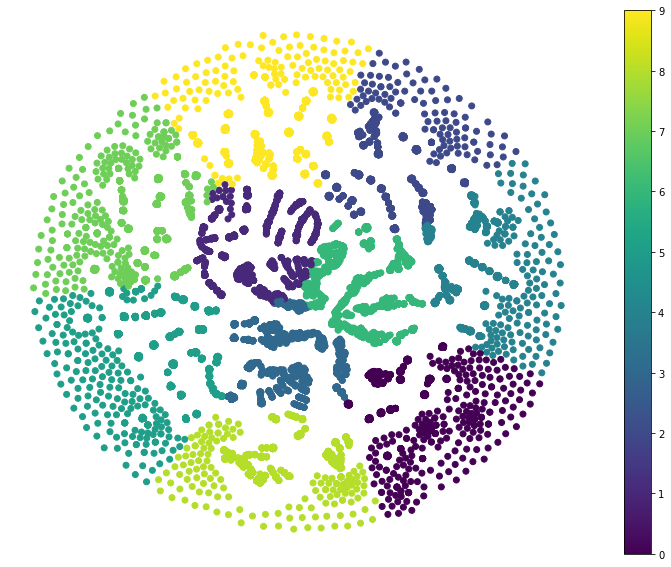

In [58]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

In [59]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=10, random_state=42)
kmean.fit_predict(train)

train['kmean'] = kmean.labels_

In [60]:
train.groupby('kmean').describe()

season                                              holiday            \
        count      mean       std  min  25%  50%  75%  max   count      mean   
kmean                                                                          
0      1124.0  2.383452  1.046443  1.0  1.0  2.0  3.0  4.0  1124.0  0.023132   
1       293.0  2.303754  0.682376  1.0  2.0  2.0  3.0  4.0   293.0  0.017065   
2      2238.0  2.149240  1.069794  1.0  1.0  2.0  3.0  4.0  2238.0  0.028597   
3       637.0  2.557300  0.867983  1.0  2.0  3.0  3.0  4.0   637.0  0.032967   
4      1203.0  2.207814  1.134120  1.0  1.0  2.0  3.0  4.0  1203.0  0.024106   
5      1248.0  1.906250  1.101152  1.0  1.0  1.0  3.0  4.0  1248.0  0.029647   
6       116.0  2.336207  0.603525  1.0  2.0  2.0  3.0  3.0   116.0  0.008621   
7       826.0  2.429782  0.898772  1.0  2.0  2.0  3.0  4.0   826.0  0.020581   
8       445.0  2.471910  0.881362  1.0  2.0  2.0  3.0  4.0   445.0  0.031461   
9       933.0  2.406217  1.032230  1.0  2.0  2.0  3.0  4.0   933.0  0.026795   

       ...  hour           day                                             \
       ...   75%   max   count       mean       std  min  25%   50%   75%   
kmean  ...                                                                  
0      ...  20.0  23.0  1124.0  10.076512  5.539418  1.0  5.0  10.0  15.0   
1      ...  18.0  21.0   293.0  10.740614  5.539487  1.0  6.0  12.0  16.0   
2      ...   5.0  23.0  2238.0   9.859696  5.450224  1.0  5.0  10.0  15.0   
3      ...  18.0  21.0   637.0  10.208791  5.464757  1.0  5.0  10.0  15.0   
4      ...  20.0  23.0  1203.0  10.237739  5.522455  1.0  6.0  10.0  15.0   
5      ...  21.0  23.0  1248.0   9.629006  5.384884  1.0  5.0  10.0  14.0   
6      ...  18.0  18.0   116.0  10.491379  5.493863  1.0  6.0  10.5  15.0   
7      ...  19.0  22.0   826.0   9.802663  5.487930  1.0  5.0  10.0  14.0   
8      ...  18.0  22.0   445.0   9.725843  5.396143  1.0  5.0  10.0  15.0   
9      ...  19.0  23.0   933.0  10.214362  5.502548  1.0  6.0  11.0  15.0   

             
        max  
kmean        
0      19.0  
1      19.0  
2      19.0  
3      19.0  
4      19.0  
5      19.0  
6      19.0  
7      19.0  
8      19.0  
9      19.0  

[10 rows x 96 columns]

In [61]:
train[train['kmean'] == 0].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.0,1124.000000,1124.000000,1124.000000
mean,2.383452,0.023132,0.75089,1.382562,21.916032,25.463759,57.658363,13.961137,168.937722,0.0,2011.315836,14.658363,10.076512
std,1.046443,0.150389,0.43269,0.612644,7.533931,8.251220,17.810440,8.669971,16.305019,0.0,0.465055,5.160195,5.539418
min,1.000000,0.000000,0.00000,1.000000,0.820000,2.275000,15.000000,0.000000,138.000000,0.0,2011.000000,0.000000,1.000000
25%,1.000000,0.000000,1.00000,1.000000,15.580000,19.695000,44.000000,7.001500,154.000000,0.0,2011.000000,11.000000,5.000000
50%,2.000000,0.000000,1.00000,1.000000,22.140000,25.760000,56.000000,12.998000,169.000000,0.0,2011.000000,14.000000,10.000000
75%,3.000000,0.000000,1.00000,2.000000,27.880000,31.820000,72.250000,19.001200,182.000000,0.0,2012.000000,20.000000,15.000000
max,4.000000,1.000000,1.00000,4.000000,38.540000,43.940000,100.000000,56.996900,198.000000,0.0,2012.000000,23.000000,19.000000


In [62]:
train[train['kmean'] == 1].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,kmean,year,hour,day
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000
mean,2.303754,0.017065,0.648464,1.215017,26.956451,30.657338,49.416382,14.433492,607.723549,1.0,2011.788396,14.515358,10.740614
std,0.682376,0.129735,0.478267,0.451231,5.188428,5.421480,17.439838,7.641357,43.716733,0.0,0.409144,3.973017,5.539487
min,1.000000,0.000000,0.000000,1.000000,11.480000,12.120000,19.000000,0.000000,545.000000,1.0,2011.000000,7.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,23.780000,27.275000,36.000000,8.998100,569.000000,1.0,2012.000000,12.000000,6.000000
50%,2.000000,0.000000,1.000000,1.000000,27.880000,31.060000,48.000000,12.998000,597.000000,1.0,2012.000000,17.000000,12.000000
75%,3.000000,0.000000,1.000000,1.000000,31.160000,34.090000,61.000000,19.001200,644.000000,1.0,2012.000000,18.000000,16.000000
max,4.000000,1.000000,1.000000,3.000000,37.720000,42.425000,94.000000,43.998900,694.000000,1.0,2012.000000,21.000000,19.000000


In [63]:
train.groupby('kmean').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,day
kmean,,,,,,,,,,,,
0,2.383452,0.023132,0.750890,1.382562,21.916032,25.463759,57.658363,13.961137,168.937722,2011.315836,14.658363,10.076512
1,2.303754,0.017065,0.648464,1.215017,26.956451,30.657338,49.416382,14.433492,607.723549,2011.788396,14.515358,10.740614
2,2.149240,0.028597,0.687668,1.488382,17.176032,20.416354,71.890080,10.952982,14.163986,2011.348525,4.414656,9.859696
3,2.557300,0.032967,0.572998,1.287284,25.548728,29.161460,52.183673,13.830693,381.838305,2011.455259,14.281005,10.208791
4,2.207814,0.024106,0.701579,1.448878,18.634381,21.882764,62.405653,13.469150,113.451372,2011.311721,13.295927,10.237739
5,1.906250,0.029647,0.601763,1.540865,15.512324,18.425861,63.092949,13.159052,61.849359,2011.298077,12.136218,9.629006
6,2.336207,0.008621,0.965517,1.267241,29.025172,32.843707,45.543103,14.353595,781.172414,2012.000000,16.465517,10.491379
7,2.429782,0.020581,0.692494,1.305085,24.727070,28.502663,54.663438,13.254344,297.102906,2011.520581,14.532688,9.802663
8,2.471910,0.031461,0.629213,1.249438,26.179191,30.020494,52.611236,14.317072,481.961798,2011.617978,14.494382,9.725843


## Comparaison au clustering précédent

In [64]:
train.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [98]:
train
windspeed = train[['temp','atemp','humidity','windspeed']]
windspeed


,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0000
1,9.02,13.635,80,0.0000
2,9.02,13.635,80,0.0000
3,9.84,14.395,75,0.0000
4,9.84,14.395,75,0.0000
...,...,...,...,...
9058,26.24,30.305,73,8.9981
9059,26.24,30.305,73,12.9980
9060,25.42,29.545,78,6.0032
9061,25.42,29.545,78,11.0014


In [101]:
y_pred = best_model.fit_predict(windspeed)

In [102]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(windspeed)

/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valentin/anaconda3/envs/exercice_flask/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


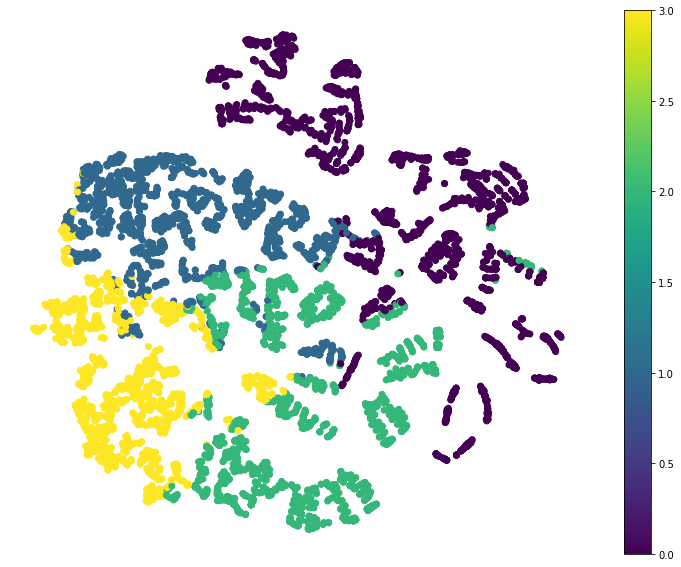

In [103]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred)
plt.axis('off')
plt.colorbar()
plt.show()

In [109]:
# kmean fit_predict 
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit_predict(train)

windspeed['kmean'] = kmean.labels_

/tmp/ipykernel_4824/161822935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed['kmean'] = kmean.labels_


In [106]:
windspeed.groupby('kmean').describe()

temp                                                           atemp  \
        count       mean       std    min    25%    50%    75%    max   count   
kmean                                                                           
0       591.0  20.595736  4.745366   9.02  17.22  20.50  22.96  35.26   591.0   
1       870.0  31.107218  4.113321  21.32  27.88  31.16  34.44  41.00   870.0   
2       987.0  22.357670  3.571095  13.94  18.86  22.14  25.42  29.52   987.0   
3       719.0  10.340668  3.842116   0.82   7.38   9.84  13.12  21.32   719.0   
4      1064.0  11.788271  3.964033   2.46   9.02  11.48  14.76  30.34  1064.0   
5       800.0  14.822525  4.445404   2.46  12.30  14.76  18.04  33.62   800.0   
6       888.0  12.025743  3.336105   3.28   9.02  12.30  14.76  25.42   888.0   
7      1305.0  27.969226  3.876491  17.22  24.60  28.70  31.16  35.26  1305.0   
8       801.0  23.610062  4.310814  13.12  20.50  23.78  27.06  31.16   801.0   
9      1038.0  25.189326  3.734072  16.40  22.14  26.24  28.70  32.80  1038.0   

                  ... humidity        windspeed                               \
            mean  ...      75%    max     count       mean       std     min   
kmean             ...                                                          
0      23.988342  ...     35.0   49.0     591.0  23.039157  8.147563  0.0000   
1      34.766770  ...     43.0   49.0     870.0  12.690909  6.856280  0.0000   
2      25.830025  ...     94.0  100.0     987.0  10.048907  6.863486  0.0000   
3      11.597552  ...     49.0   60.0     719.0  23.206247  6.767622  7.0015   
4      14.533238  ...     66.0   75.0    1064.0  11.190152  6.695748  0.0000   
5      18.135044  ...     49.0   59.0     800.0  10.068894  5.692612  0.0000   
6      15.161509  ...     87.0  100.0     888.0   8.484667  6.951928  0.0000   
7      32.274605  ...     60.0   66.0    1305.0  13.666891  7.391550  0.0000   
8      27.495287  ...     82.0   94.0     801.0  13.935322  7.933932  0.0000   
9      29.259075  ...     77.0   79.0    1038.0   9.423402  5.818505  0.0000   

                                           
           25%      50%      75%      max  
kmean                                      
0      16.9979  22.0028  27.9993  56.9969  
1       8.9981  12.9980  16.9979  35.0008  
2       6.0032   8.9981  15.0013  39.0007  
3      19.0012  22.0028  27.9993  51.9987  
4       7.0015  11.0014  15.0013  36.9974  
5       7.0015  11.0014  15.0013  22.0028  
6       4.5024   7.0015  12.9980  40.9973  
7       8.9981  12.9980  19.0012  40.9973  
8       8.9981  12.9980  19.0012  43.0006  
9       6.0032   8.9981  12.9980  27.9993  

[10 rows x 32 columns]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

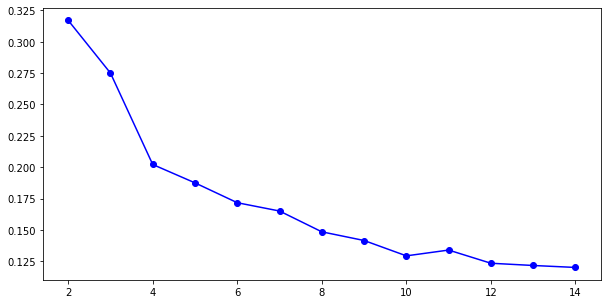

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel(train['weather'], fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

Le clustering est basé sur : 
- un groupe d'utilisateurs qui n'utilisent pas le vélos pendant les vancances et uniquement les jours de travail 
- Un groupe d'utilisateurs qui utilisent majoritairement le vélos lors des jours de travail et de temps en temps lors des vacances 
- Un groupe d'utilisateurs qui est sensible à l'humidité 
- Un groupe d'utilisateur qui est mojns sensible à l'humidité 

## Conclusion

Propositions de solutions pour améliorer l'offre actuelle : 
* Proposer 2 forfaits différents : 
- Un forfait de 5 h à 9 h 
- Un forfait pour la pause du midi/aprés midi

In [110]:
windspeed['weather'] = train['weather']
windspeed

/tmp/ipykernel_4824/2863309986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed['weather'] = train['weather']


,temp,atemp,humidity,windspeed,kmean,weather
0,9.84,14.395,81,0.0000,0,1
1,9.02,13.635,80,0.0000,0,1
2,9.02,13.635,80,0.0000,0,1
3,9.84,14.395,75,0.0000,0,1
4,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...
9058,26.24,30.305,73,8.9981,3,2
9059,26.24,30.305,73,12.9980,3,2
9060,25.42,29.545,78,6.0032,0,3
9061,25.42,29.545,78,11.0014,3,2


In [113]:
windspeed[windspeed['kmean'] == 0]

,temp,atemp,humidity,windspeed,kmean,weather
0,9.84,14.395,81,0.0000,0,1
1,9.02,13.635,80,0.0000,0,1
2,9.02,13.635,80,0.0000,0,1
3,9.84,14.395,75,0.0000,0,1
4,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...
9050,26.24,29.545,78,11.0014,0,3
9052,26.24,28.790,83,8.9981,0,3
9056,26.24,29.545,78,7.0015,0,2
9057,26.24,29.545,78,7.0015,0,2


In [111]:
windspeed[windspeed['kmean'] == 1]

,temp,atemp,humidity,windspeed,kmean,weather
679,13.12,15.910,21,11.0014,1,1
681,12.30,16.665,24,0.0000,1,1
724,15.58,19.695,29,23.9994,1,1
725,16.40,20.455,30,27.9993,1,2
726,16.40,20.455,30,19.9995,1,2
...,...,...,...,...,...,...
9031,31.16,33.335,37,16.9979,1,1
9032,31.16,33.335,37,15.0013,1,1
9033,30.34,32.575,37,11.0014,1,1
9034,28.70,31.820,45,11.0014,1,1


In [114]:
windspeed[windspeed['kmean'] == 2]

,temp,atemp,humidity,windspeed,kmean,weather
35,14.76,16.665,66,19.9995,2,2
40,13.94,16.665,57,12.9980,2,1
41,14.76,16.665,46,22.0028,2,2
42,13.12,14.395,42,30.0026,2,1
43,12.30,13.635,39,23.9994,2,1
...,...,...,...,...,...,...
7486,17.22,21.210,50,16.9979,2,1
7487,18.86,22.725,44,16.9979,2,1
7674,20.50,24.240,48,7.0015,2,1
9002,31.16,12.120,52,19.0012,2,1


In [115]:
windspeed[windspeed['kmean'] == 3]

,temp,atemp,humidity,windspeed,kmean,weather
36,14.76,17.425,66,8.9981,3,2
420,16.40,20.455,62,19.0012,3,1
590,13.94,16.665,66,8.9981,3,2
824,19.68,23.485,55,22.0028,3,1
825,19.68,23.485,59,22.0028,3,1
...,...,...,...,...,...,...
9055,27.06,31.060,65,0.0000,3,2
9058,26.24,30.305,73,8.9981,3,2
9059,26.24,30.305,73,12.9980,3,2
9061,25.42,29.545,78,11.0014,3,2


In [117]:
windspeed.groupby('kmean').describe()

temp                                                           atemp  \
        count       mean       std    min    25%    50%    75%    max   count   
kmean                                                                           
0      2882.0  18.433498  6.328194   3.28  13.94  18.86  23.78  30.34  2882.0   
1      1724.0  26.753213  6.304444  10.66  22.14  26.24  32.80  41.00  1724.0   
2      2064.0  11.385048  3.836949   0.82   8.20  11.48  13.94  31.16  2064.0   
3      2393.0  26.171467  4.537134  12.30  22.96  27.06  29.52  35.26  2393.0   

                  ... windspeed          weather                           \
            mean  ...       75%      max   count      mean       std  min   
kmean             ...                                                       
0      21.821796  ...   15.0013  43.0006  2882.0  1.755031  0.767948  1.0   
1      30.414159  ...   19.9995  56.9969  1724.0  1.162413  0.420405  1.0   
2      13.663375  ...   19.9995  51.9987  2064.0  1.220930  0.446485  1.0   
3      30.371613  ...   16.9979  43.0006  2393.0  1.330965  0.545534  1.0   

                           
       25%  50%  75%  max  
kmean                      
0      1.0  2.0  2.0  4.0  
1      1.0  1.0  1.0  3.0  
2      1.0  1.0  1.0  3.0  
3      1.0  1.0  2.0  3.0  

[4 rows x 40 columns]

In [119]:
windspeed.groupby('weather').describe()

temp                                                         \
          count       mean       std   min    25%    50%    75%    max   
weather                                                                  
1        6095.0  20.782796  8.441012  0.82  13.94  21.32  27.88  41.00   
2        2233.0  19.912082  7.426818  3.28  13.94  20.50  26.24  39.36   
3         734.0  19.389537  6.608616  3.28  14.76  19.68  24.60  37.72   
4           1.0   8.200000       NaN  8.20   8.20   8.20   8.20   8.20   

          atemp             ... windspeed            kmean            \
          count       mean  ...       75%      max   count      mean   
weather                     ...                                        
1        6095.0  24.187122  ...   19.0012  51.9987  6095.0  1.612305   
2        2233.0  23.372960  ...   16.9979  47.9988  2233.0  1.271832   
3         734.0  22.590198  ...   19.0012  56.9969   734.0  0.495913   
4           1.0  11.365000  ...    6.0032   6.0032     1.0  0.000000   

                                            
              std  min  25%  50%  75%  max  
weather                                     
1        1.102469  0.0  1.0  2.0  3.0  3.0  
2        1.285429  0.0  0.0  1.0  3.0  3.0  
3        1.035184  0.0  0.0  0.0  0.0  3.0  
4             NaN  0.0  0.0  0.0  0.0  0.0  

[4 rows x 40 columns]

In [116]:
windspeed.groupby('kmean').mean()

,temp,atemp,humidity,windspeed,weather
kmean,,,,,
0,18.433498,21.821796,83.425746,10.006957,1.755031
1,26.753213,30.414159,36.378190,16.145737,1.162413
2,11.385048,13.663375,48.688469,15.727565,1.220930
3,26.171467,30.371613,62.719181,11.867363,1.330965


In [120]:
windspeed.groupby('weather').mean()

,temp,atemp,humidity,windspeed,kmean
weather,,,,,
1,20.782796,24.187122,55.975390,13.053936,1.612305
2,19.912082,23.372960,68.420511,12.301245,1.271832
3,19.389537,22.590198,81.321526,14.301323,0.495913
4,8.200000,11.365000,86.000000,6.003200,0.000000
